In [1]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /home/hjzheng/.cache/huggingface/token
Login successful


In [3]:
!pip install git+https://github.com/Perp-Neg/Perp-Neg-stablediffusion.git
!pip install diffusers

Obtaining file:///data/hjzheng/perpneg-diffusion
  Preparing metadata (setup.py) ... done
  Attempting uninstall: perpneg-diffusion
    Found existing installation: perpneg-diffusion 2.0
    Uninstalling perpneg-diffusion-2.0:
      Successfully uninstalled perpneg-diffusion-2.0
  Running setup.py develop for perpneg-diffusion


# **Perp-Neg using pretrained Stable-Diffusion 1v-4**

In [1]:
import torch
import torch as th
from IPython.display import display
import os
from PIL import Image
from torch import autocast
from perpneg_diffusion.perpneg_stable_diffusion.pipeline_composable_stable_diffusion import ComposableStableDiffusionPipeline

has_cuda = torch.cuda.is_available()
device = torch.device('cpu' if not has_cuda else 'cuda')
print(device)

# initialize stable diffusion model
pipe = ComposableStableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True
).to(device)

cuda


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [2]:
from perpneg_diffusion.perpneg_stable_diffusion.pipeline_perpneg_stable_diffusion import PerpStableDiffusionPipeline


has_cuda = torch.cuda.is_available()
device2 = torch.device('cpu' if not has_cuda else 'cuda:1')
print(device2)

# initialize stable diffusion model
pipe_perpneg = PerpStableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True
).to(device2)

cuda:1


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/51 [00:00<?, ?it/s]

[False]


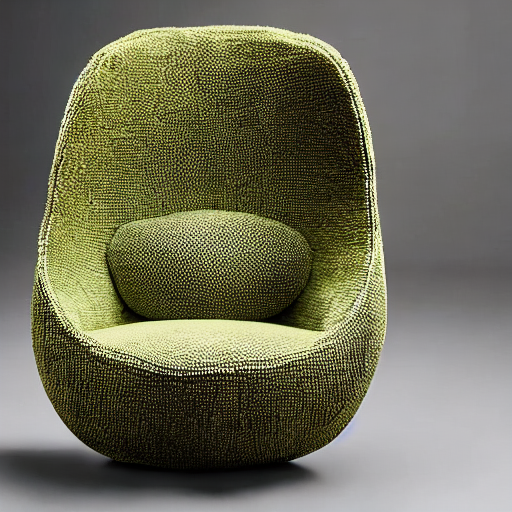

composing ['an armchair in the shape of an avocado', 'cushion in the armchair']...


  0%|          | 0/51 [00:00<?, ?it/s]

[False]


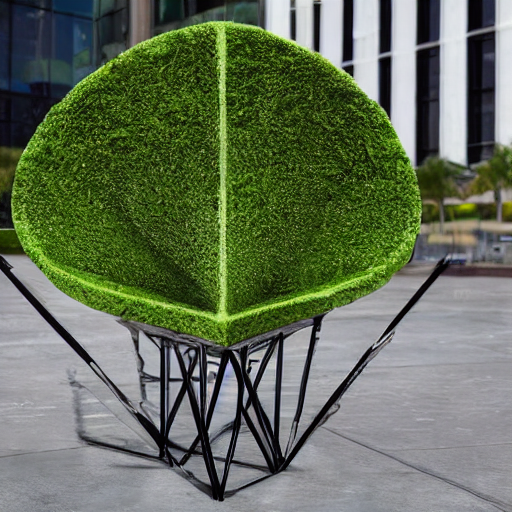

composing ['an armchair in the shape of an avocado', 'cushion in the armchair']...


  0%|          | 0/51 [00:00<?, ?it/s]

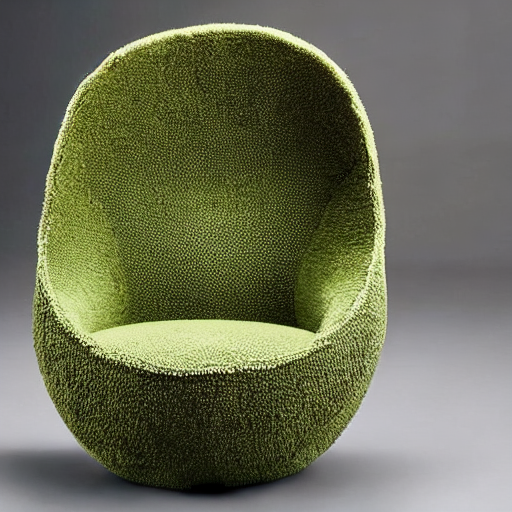

In [3]:
# Sampling parameters
#@markdown Here is an example of composing sentences using <b>Negation operator (NOT).</b> \
#@markdown <b>Negative weights should be assigned to the textes you wish to negate.</b> \
#@markdown `prompt`: when composing  multiple sentences, using `|` as the delimiter.\
#@markdown `weight`: weight indicates the weight importance of sentence when composing, also using `|` as the delimiter.
prompt = "an armchair in the shape of an avocado | cushion in the armchair" #@param{type: 'string'}
weights = "1 | -0.3" #@param{type: 'string'}
scale = 7.5 #@param{type: 'number'}
steps = 50 #@param{type: 'number'}
seed = 145 #@param{type: 'number'}

# positive prompt only
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe("an armchair in the shape of an avocado", guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights="1")["images"][0]
    display(image)

# composing prompts with CEBM
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image)
    
# fusing prompts with perpneg
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image_perpneg = pipe_perpneg(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image_perpneg)

  0%|          | 0/51 [00:00<?, ?it/s]

[False]


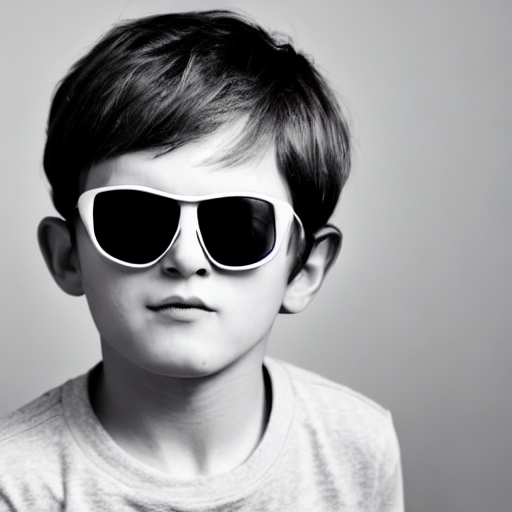

composing ['A boy wearing sunglasses', 'a pair of sunglasses with white frame']...


  0%|          | 0/51 [00:00<?, ?it/s]

[False]


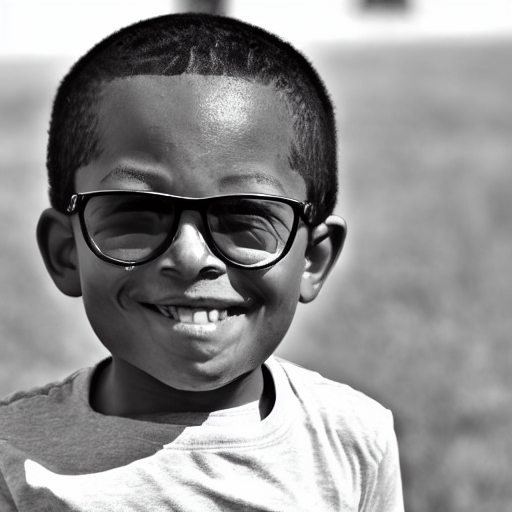

composing ['A boy wearing sunglasses', 'a pair of sunglasses with white frame']...


  0%|          | 0/51 [00:00<?, ?it/s]

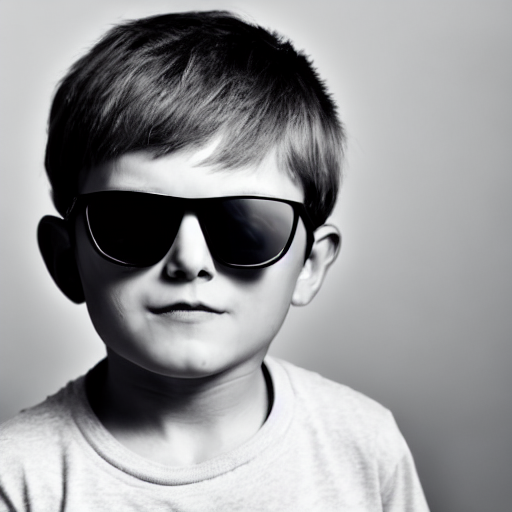

In [4]:
# Sampling parameters
#@markdown Here is an example of composing sentences using <b>Negation operator (NOT).</b> \
#@markdown <b>Negative weights should be assigned to the textes you wish to negate.</b> \
#@markdown `prompt`: when composing  multiple sentences, using `|` as the delimiter.\
#@markdown `weight`: weight indicates the weight importance of sentence when composing, also using `|` as the delimiter.
prompt = "A boy wearing sunglasses | a pair of sunglasses with white frame" #@param{type: 'string'}
weights = "1 | -0.35" #@param{type: 'string'}
scale = 11 #@param{type: 'number'}
steps = 50 #@param{type: 'number'}
seed = 200 #@param{type: 'number'}

# positive prompt only
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe("A boy wearing sunglasses", guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights="1")["images"][0]
    display(image)

# composing prompts with CEBM
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image)
    
# fusing prompts with perpneg
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image_perpneg = pipe_perpneg(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image_perpneg)

  0%|          | 0/51 [00:00<?, ?it/s]

[False]


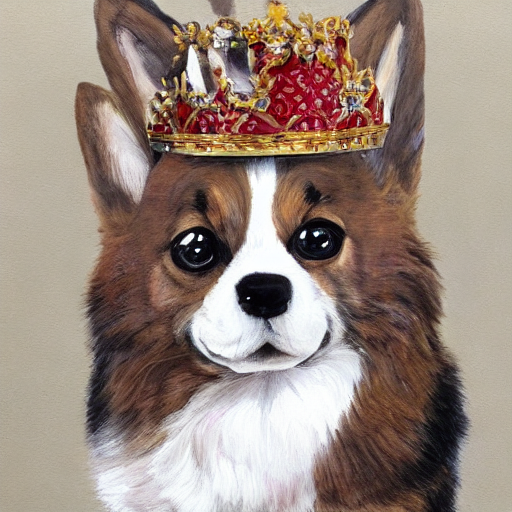

composing ['A painting of a cute corgi wearing a crown', 'a crown with red ruby decoration']...


  0%|          | 0/51 [00:00<?, ?it/s]

[False]


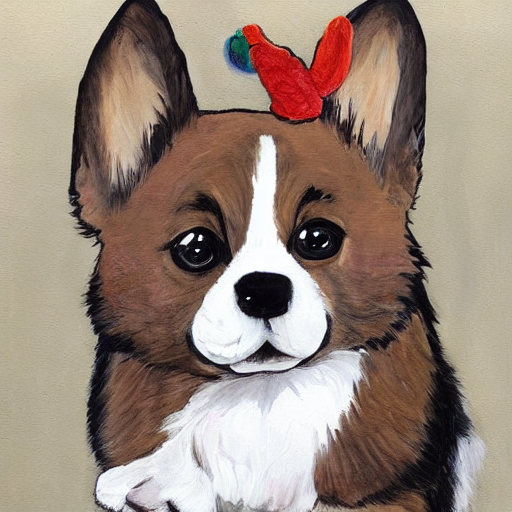

composing ['A painting of a cute corgi wearing a crown', 'a crown with red ruby decoration']...


  0%|          | 0/51 [00:00<?, ?it/s]

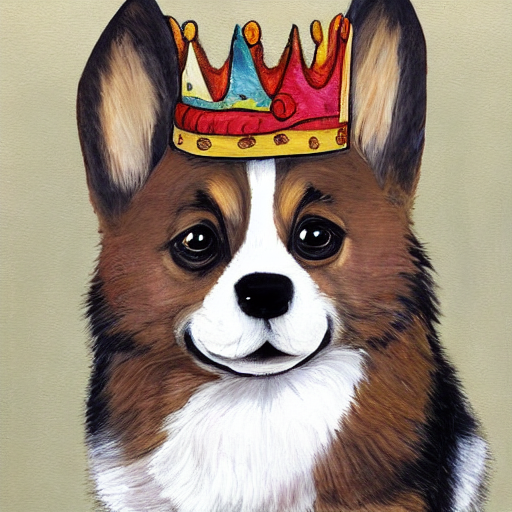

In [5]:
# Sampling parameters
#@markdown Here is an example of composing sentences using <b>Negation operator (NOT).</b> \
#@markdown <b>Negative weights should be assigned to the textes you wish to negate.</b> \
#@markdown `prompt`: when composing  multiple sentences, using `|` as the delimiter.\
#@markdown `weight`: weight indicates the weight importance of sentence when composing, also using `|` as the delimiter.
prompt = "A painting of a cute corgi wearing a crown | a crown with red ruby decoration" #| green cushion in the chair" #@param{type: 'string'}
weights = "1 | -0.8" #@param{type: 'string'}
scale = 3.5 #@param{type: 'number'}
steps = 50 #@param{type: 'number'}
seed = 200

# positive prompt only
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe("A painting of a cute corgi wearing a crown", guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights="1")["images"][0]
    display(image)

# composing prompts with CEBM
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image)
    
# fusing prompts with perpneg
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image_perpneg = pipe_perpneg(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image_perpneg)

  0%|          | 0/51 [00:00<?, ?it/s]

[False]


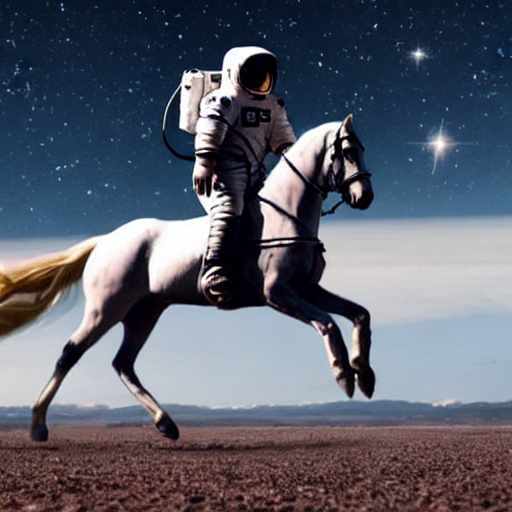

composing ['a photo of an astronaut riding a horse', 'a jumping horse', 'a white horse']...


  0%|          | 0/51 [00:00<?, ?it/s]

[False]


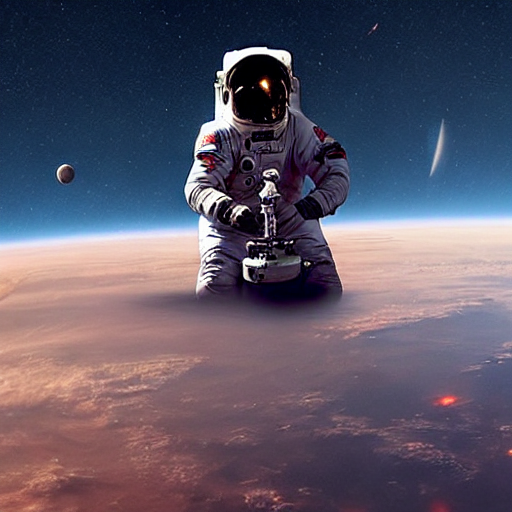

composing ['a photo of an astronaut riding a horse', 'a jumping horse', 'a white horse']...


  0%|          | 0/51 [00:00<?, ?it/s]

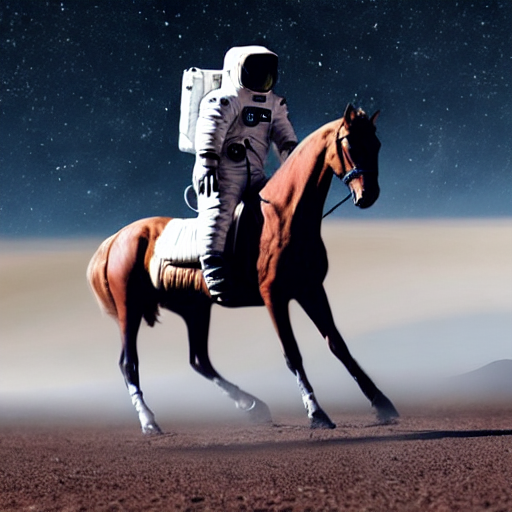

In [6]:
# Sampling parameters
#@markdown Here is an example of composing sentences using <b>Negation operator (NOT).</b> \
#@markdown <b>Negative weights should be assigned to the textes you wish to negate.</b> \
#@markdown `prompt`: when composing  multiple sentences, using `|` as the delimiter.\
#@markdown `weight`: weight indicates the weight importance of sentence when composing, also using `|` as the delimiter.
prompt = "a photo of an astronaut riding a horse | a jumping horse | a white horse" #| green cushion in the chair" #@param{type: 'string'}
weights = "1 | -0.17 | -0.1" #@param{type: 'string'}
scale = 10 #@param{type: 'number'}
steps = 50 #@param{type: 'number'}
seed = 1988
generator = th.Generator('cuda').manual_seed(seed)

# positive prompt only
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe("a photo of an astronaut riding a horse", guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights="1")["images"][0]
    display(image)

# composing prompts with CEBM
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image = pipe(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image)
    
# fusing prompts with perpneg
with autocast('cpu' if not has_cuda else 'cuda'):
    generator = th.Generator('cuda').manual_seed(seed)
    image_perpneg = pipe_perpneg(prompt, guidance_scale=scale, generator=generator,
                 num_inference_steps=steps, weights=weights)["images"][0]
    display(image_perpneg)